In [95]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import torch

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
datawiners = load_dataset('championsdata.csv')
datalosers = load_dataset('runnerupsdata.csv')
dataset = pd.concat([datawiners,datalosers])
data = dataset.values

x = data[:, :2]
y = data[:, 2]

dataset.info(verbose=True)

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 219
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    440 non-null    int64  
 1   Team    440 non-null    object 
 2   Game    440 non-null    int64  
 3   Win     440 non-null    int64  
 4   Home    440 non-null    int64  
 5   MP      440 non-null    int64  
 6   FG      440 non-null    int64  
 7   FGA     440 non-null    int64  
 8   FGP     440 non-null    float64
 9   TP      440 non-null    int64  
 10  TPA     440 non-null    int64  
 11  TPP     431 non-null    float64
 12  FT      440 non-null    int64  
 13  FTA     440 non-null    int64  
 14  FTP     440 non-null    float64
 15  ORB     440 non-null    int64  
 16  DRB     440 non-null    int64  
 17  TRB     440 non-null    int64  
 18  AST     440 non-null    int64  
 19  STL     440 non-null    int64  
 20  BLK     440 non-null    int64  
 21  TOV     440 non-null    int64  
 22  PF

In [96]:
print("Nombre de valors no existents:")
print(dataset.isnull().sum())

Nombre de valors no existents:
Year    0
Team    0
Game    0
Win     0
Home    0
MP      0
FG      0
FGA     0
FGP     0
TP      0
TPA     0
TPP     9
FT      0
FTA     0
FTP     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64


In [97]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108


In [98]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,Year,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,440.000,440.000,440.000,440.000,440.000,440.000,440.000,440.000,440.000,440.000,...,440.000,440.000,440.000,440.000,440.000,440.000,440.000,440.000,440.000,440.000
mean,1998.866,3.400,0.498,0.500,241.932,37.050,81.334,0.456,5.052,14.586,...,0.742,12.184,29.480,41.664,21.843,7.611,5.136,13.675,23.309,98.600
std,11.301,1.732,0.501,0.501,12.816,6.360,9.145,0.058,4.042,9.587,...,0.097,4.533,4.695,6.280,6.060,2.860,2.764,3.860,4.511,13.681
min,1980.000,1.000,0.000,0.000,40.000,21.000,60.000,0.289,0.000,0.000,...,0.368,2.000,16.000,22.000,8.000,0.000,0.000,3.000,12.000,54.000
25%,1989.000,2.000,0.000,0.000,240.000,32.000,75.000,0.416,2.000,7.000,...,0.677,9.000,26.000,37.000,17.000,6.000,3.000,11.000,20.000,89.000
50%,1999.000,3.000,0.000,0.500,240.000,37.000,81.000,0.455,4.000,14.000,...,0.744,12.000,30.000,41.000,21.000,7.000,5.000,13.000,23.000,98.000
75%,2009.000,5.000,1.000,1.000,240.000,41.000,87.000,0.493,8.000,20.000,...,0.811,15.000,33.000,45.000,26.000,9.000,7.000,16.000,26.000,107.250
max,2018.000,7.000,1.000,1.000,315.000,62.000,130.000,0.625,24.000,45.000,...,1.000,28.000,44.000,63.000,44.000,18.000,14.000,26.000,38.000,148.000


<IPython.core.display.Javascript object>


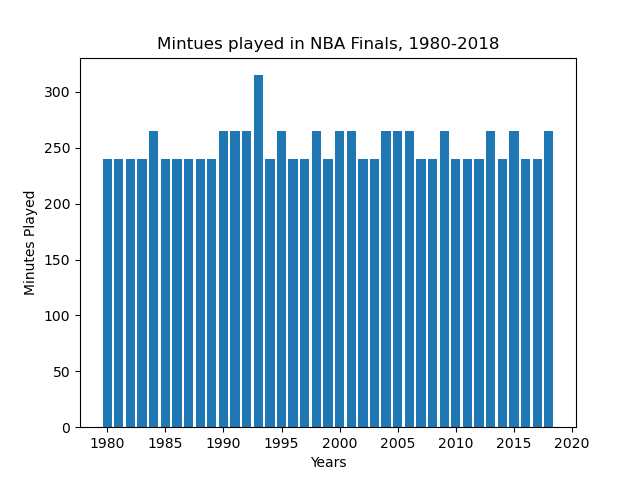

Text(0, 0.5, 'Minutes Played')

In [99]:
plt.figure()
y = dataset.MP
x = dataset.Year
plt.bar(x,y)
plt.title("Mintues played in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Minutes Played")

<IPython.core.display.Javascript object>


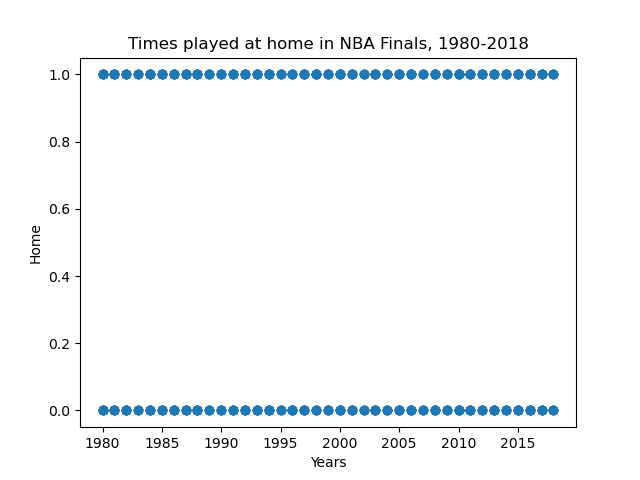

Text(0, 0.5, 'Home')

In [100]:
plt.figure()
x = dataset.Year
y = dataset.Home
plt.scatter(x,y)
plt.title("Times played at home in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Home")

<IPython.core.display.Javascript object>


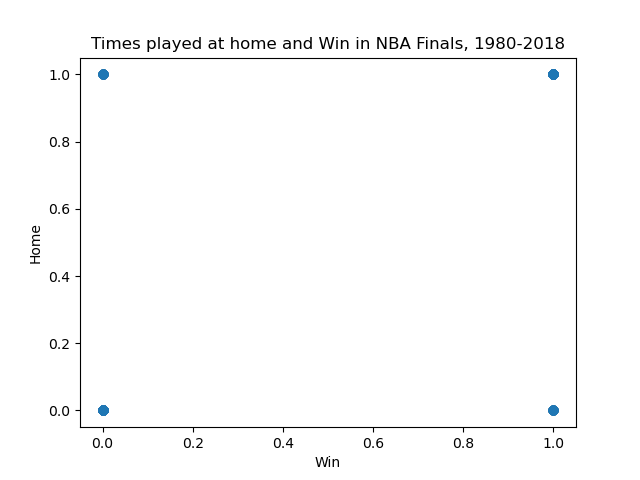

Text(0, 0.5, 'Home')

In [101]:
plt.figure()
x = dataset.Win
y = dataset.Home
plt.scatter(x,y)
plt.title("Times played at home and Win in NBA Finals, 1980-2018")
plt.xlabel("Win")
plt.ylabel("Home")

<IPython.core.display.Javascript object>


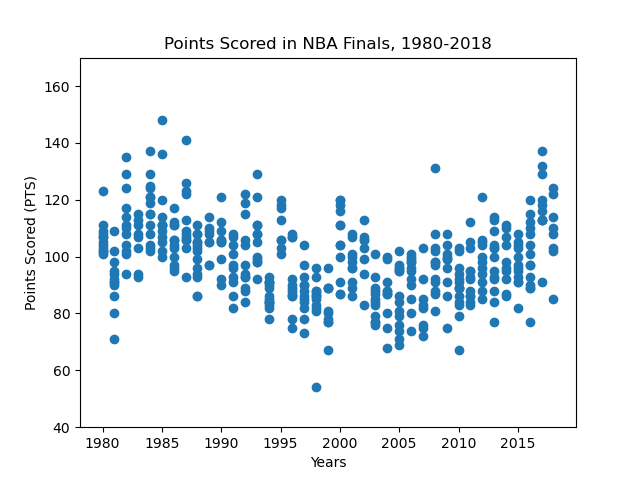

Text(0, 0.5, 'Points Scored (PTS)')

In [102]:
plt.figure()
x = dataset.Year
y = dataset.PTS
plt.scatter(x,y)
plt.ylim(40,170)
plt.title("Points Scored in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Points Scored (PTS)")

<IPython.core.display.Javascript object>


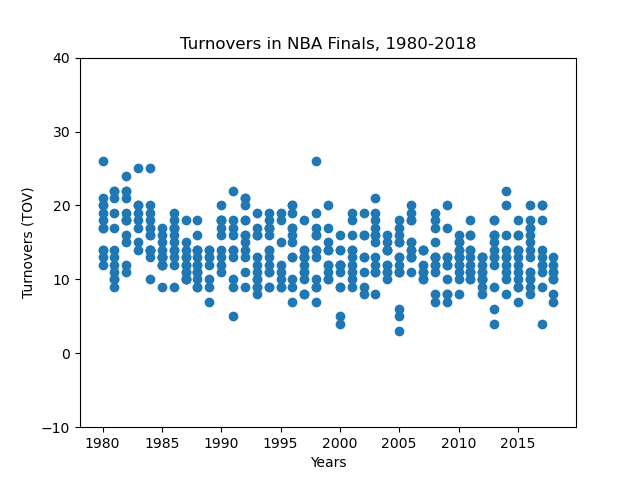

Text(0, 0.5, 'Turnovers (TOV)')

In [103]:
plt.figure()
x = dataset.Year
y = dataset.TOV
plt.scatter(x,y)
plt.ylim(-10,40)
plt.title("Turnovers in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Turnovers (TOV)")

<IPython.core.display.Javascript object>


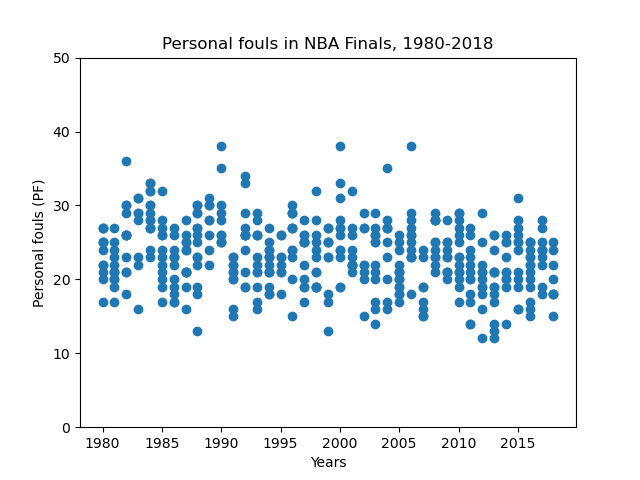

Text(0, 0.5, 'Personal fouls (PF)')

In [104]:
plt.figure()
x = dataset.Year
y = dataset.PF
plt.scatter(x,y)
plt.ylim(0,50)
plt.title("Personal fouls in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Personal fouls (PF)")

<IPython.core.display.Javascript object>


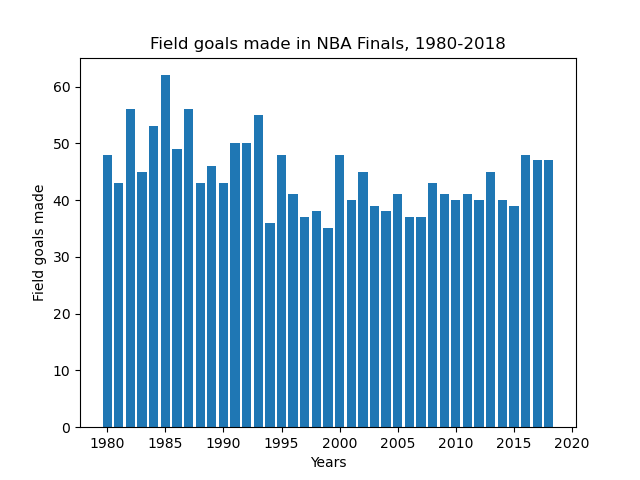

Text(0, 0.5, 'Field goals made')

In [105]:
plt.figure()
y = dataset.FG
x = dataset.Year
plt.bar(x,y)
plt.title("Field goals made in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Field goals made")

<IPython.core.display.Javascript object>


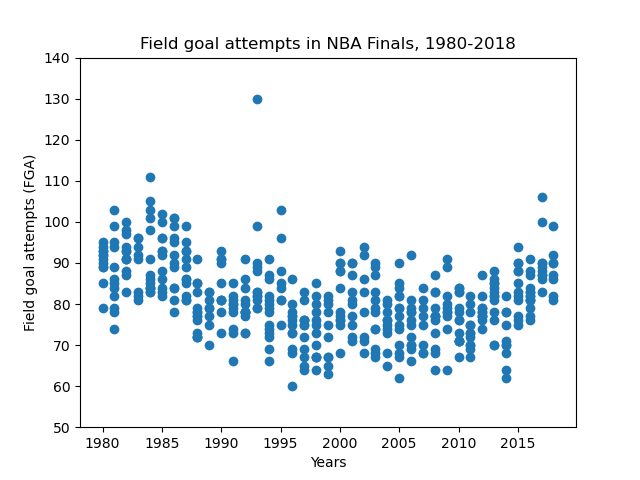

Text(0, 0.5, 'Field goal attempts (FGA)')

In [106]:
plt.figure()
x = dataset.Year
y = dataset.FGA
plt.scatter(x,y)
plt.ylim(50,140)
plt.title("Field goal attempts in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Field goal attempts (FGA)")

<IPython.core.display.Javascript object>


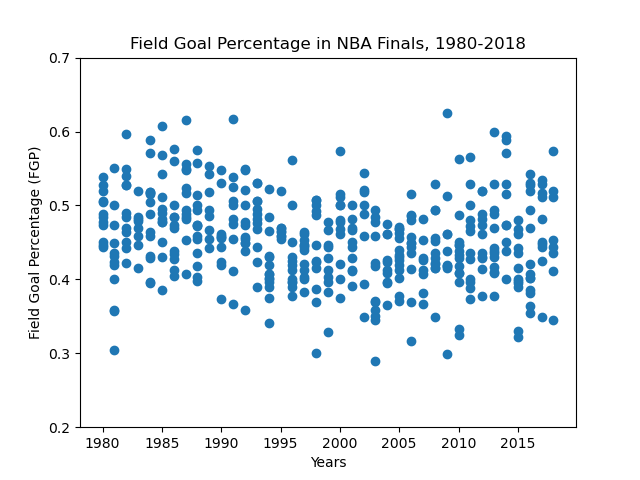

Text(0, 0.5, 'Field Goal Percentage (FGP)')

In [107]:
plt.figure()
x = dataset.Year
y = dataset.FGP
plt.scatter(x,y)
plt.ylim(0.2,0.7)
plt.title("Field Goal Percentage in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Field Goal Percentage (FGP)")

<IPython.core.display.Javascript object>


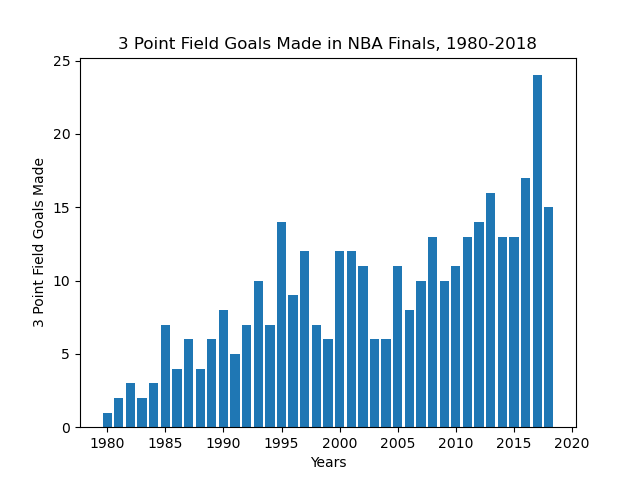

Text(0, 0.5, '3 Point Field Goals Made')

In [108]:
plt.figure()
y = dataset.TP
x = dataset.Year
plt.bar(x,y)
plt.title("3 Point Field Goals Made in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("3 Point Field Goals Made")

<IPython.core.display.Javascript object>


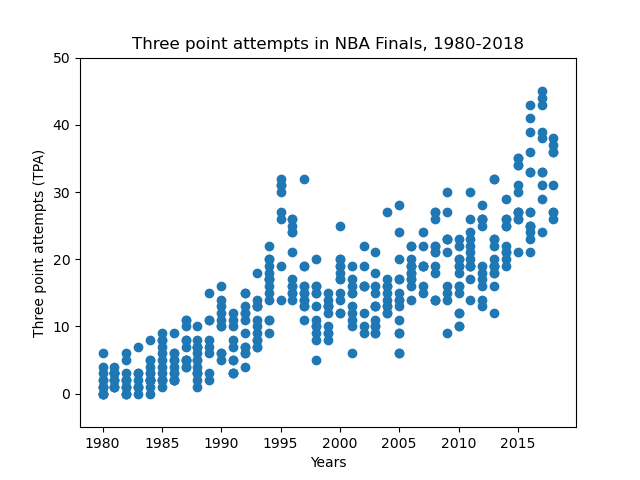

Text(0, 0.5, 'Three point attempts (TPA)')

In [109]:
plt.figure()
x = dataset.Year
y = dataset.TPA
plt.scatter(x,y)
plt.ylim(-5,50)
plt.title("Three point attempts in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Three point attempts (TPA)")

<IPython.core.display.Javascript object>


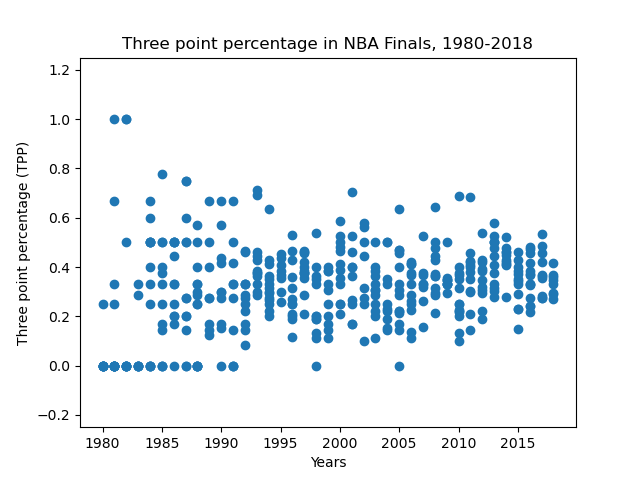

Text(0, 0.5, 'Three point percentage (TPP)')

In [110]:
plt.figure()
x = dataset.Year
y = dataset.TPP
plt.scatter(x,y)
plt.ylim(-0.25,1.25)
plt.title("Three point percentage in NBA Finals, 1980-2018")
plt.xlabel("Years")
plt.ylabel("Three point percentage (TPP)")

Mirem la correlació entre els atributs d'entrada per entendre millor les dades


<IPython.core.display.Javascript object>


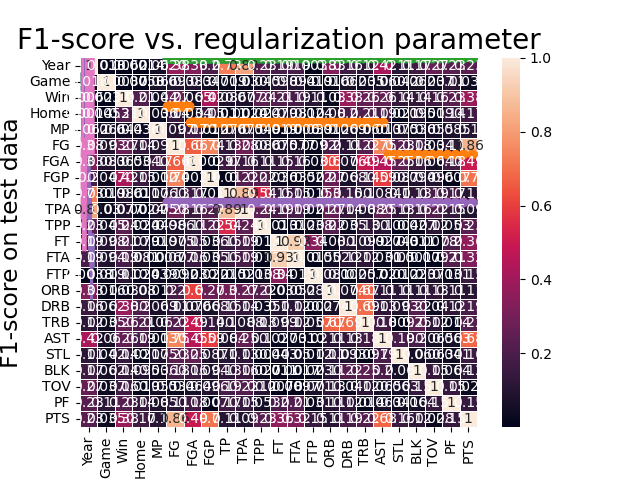

In [146]:
import seaborn as sns

print("Mirem la correlació entre els atributs d'entrada per entendre millor les dades")
correlacio = dataset.corr()

plt.figure()

# apliquem el valor absolut, per diferenciarles millor
ax = sns.heatmap(abs(correlacio), annot=True, linewidths=.5)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Year', 'Team','Win','Home','Game', 'MP','FG', 'FGP', 'TP', 'TPP', 'FT','FTA','FTP','ORB','DRB','TRB','AST','STL','BLK','PTS'],axis=1), 
                                                    dataset['Win'], test_size=0.30, 
                                                    random_state=111)

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

In [163]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
test_fraction =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Year', 'Team','Win','Home','Game', 'MP','FG', 'FGP', 'TP', 'TPP', 'FT','FTA','FTP','ORB','DRB','TRB','AST','STL','BLK','PTS'],axis=1), 
                                                    dataset['Win'], test_size=0.1+(i-1)*0.007, 
                                                    random_state=111)
        logmodel =(LogisticRegression(C=1,tol=1e-4, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        test_fraction[i]=0.1+(i-1)*0.007

plt.plot(test_fraction[1:len(test_fraction)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. test set size (fraction)",fontsize=20)
plt.xlabel("Test set size (fraction)",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

In [164]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
random_init =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Year', 'Team','Win','Home','Game', 'MP','FG', 'FGP', 'TP', 'TPP', 'FT','FTA','FTP','ORB','DRB','TRB','AST','STL','BLK','PTS'],axis=1), 
                                                    dataset['Win'], test_size=0.3, 
                                                    random_state=i+100)
        logmodel =(LogisticRegression(C=1,tol=1e-5, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        random_init[i]=i+100

plt.plot(random_init[1:len(random_init)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. random initialization seed",fontsize=20)
plt.xlabel("Random initialization seed",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()